# Organizational Model Training with Weights & Biases and Hydra
Organization into three pieces: experiment tracking (W&B), hyperparameter search (Sweeps) asnd configuration setup (Hydra).


In [2]:
! pip install torch
! pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.8 MB/s 
     |████████████████████████████████| 182 kB 63.8 MB/s 
     |████████████████████████████████| 162 kB 45.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 162 kB 65.9 MB/s 
     |████████████████████████████████| 158 kB 60.6 MB/s 
     |████████████████████████████████| 157 kB 69.5 MB/s 
     |████████████████████████████████| 157 kB 57.2 MB/s 
     |████████████████████████████████| 157 kB 73.3 MB/s 
     |████████████████████████████████| 157 kB 47.4 MB/s 
     |████████████████████████████████| 157 kB 57.0 MB/s 
     |████████████████████████████████| 157 kB 55.9 MB/s 
     |████████████████████████████████| 157 kB 56.8 MB/s 
     |████████████████████████████████| 156 kB 72.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=43

## Experiment Tracking
### Logging
Simulation of a training run, print the hyperparameters, and the loss + accuracy of the model as it is training.


In [3]:
import random
def run_training_run_txt_log(epochs, lr):
  print(f"Training for {epochs} epochs with learning rate {lr}")
  offset = random.random() / 5

  for epoch in range(2, epochs):
    # Simulating a training run
    acc = 1 - 2 ** - epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    print(f"epoch = {epoch}, acc = {acc}, loss = {loss}")

# run a training run with a learning rate of 0.1
run_training_run_txt_log(epochs = 10, lr = 0.01)

Training for 10 epochs with learning rate 0.01
epoch = 2, acc = 0.5318531952209633, loss = 0.6472612597856011
epoch = 3, acc = 0.4328535906461069, loss = 0.4678890882940598
epoch = 4, acc = 0.7779582258257718, loss = 0.3421510855451745
epoch = 5, acc = 0.6453370856495333, loss = 0.2513631224441336
epoch = 6, acc = 0.7409278652431806, loss = 0.16676957313145274
epoch = 7, acc = 0.7300347189963541, loss = 0.21656127096084915
epoch = 8, acc = 0.7474964765877083, loss = 0.23143165241514257
epoch = 9, acc = 0.8282295936141626, loss = 0.1513940849861509


### Weights and Biases
The ML platform for developers to build better models faster. Lightweight, interoperable tools to quicly track experiments, version and iterate on datasets, evaluate model performance, reproduce models, visualize results and spot regression and share findings with colleagues. Other options are Tensorboard, Neptune. 

Create an account and ten add your token.

In [6]:
# Log in to your wandb account 
import wandb
wandb.login()


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [8]:
# Make the simulation function work with wandb
def run_training_run_txt_log(epochs, lr):
  print(f"Training for {epochs} epochs with learning rate {lr}")

  wandb.init(
      # Set the project where this run will be logged
      project = "example_cs_197",
      # Track hyperparameters and run metadata
      config = {
          "learning_rate": lr,
          "epochs": epochs
      }
  )

  offset = random.random() / 5

  for epoch in range(2, epochs):
    # Simulating a training run
    acc = 1 - 2 ** - epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset
    print(f"epoch = {epoch}, acc = {acc}, loss = {loss}")
    
    wandb.log({"acc": acc, "loss": loss})
  
  wandb.finish()

run_training_run_txt_log(epochs = 10, lr = 0.01)

wandb: Currently logged in as: maxcasas. Use `wandb login --relogin` to force relogin


Training for 10 epochs with learning rate 0.01


epoch = 2, acc = 0.5733573832867167, loss = 0.7674602646680175
epoch = 3, acc = 0.578661476282913, loss = 0.3468168433677419
epoch = 4, acc = 0.669359095864029, loss = 0.290439048699512
epoch = 5, acc = 0.7478045240717313, loss = 0.31489468347394545
epoch = 6, acc = 0.8321779495933321, loss = 0.3069710102538465
epoch = 7, acc = 0.8183653369074675, loss = 0.2836500294441602
epoch = 8, acc = 0.7365481245456909, loss = 0.1761135935596272
epoch = 9, acc = 0.8036180072537409, loss = 0.25739805349116385


acc,▁▁▄▆██▅▇
loss,█▃▂▃▃▂▁▂
acc,0.80362
loss,0.2574


* wandb.init() once at the beginning of your script to initialize a new job. This creates a new run in W&B and launches a background process to sync data
* wandb.log(dict) to log a dictionary of metrics, media or custom objects to a step. See how our models and data evolve over time
* wandb.finish to make a run as finished, and finish uploading all data

In our information tab, we should also be able to see config and a summary that tells us the last value of ascc and of loss. 

1. We are able to see how the accuracy and loss changed over each step of the loop
2. See the config (hyperparameters associated with the run)
3. See the final acc and loss achieved by our run

### Multiple experiments
How would we track multiple runs?



In [9]:
def run_multiple_training_runs(epochs, lrs):
  for epoch in epochs:
    for lr in lrs:
      run_training_run_txt_log(epoch, lr)

# Try different values for the learning rate
epochs = [100, 120, 140]
lrs = [0.1, 0.01, 0.001, 0.0001]
run_multiple_training_runs(epochs, lrs)

Training for 100 epochs with learning rate 0.1


epoch = 2, acc = 0.5312887087842076, loss = 0.7932923292625239
epoch = 3, acc = 0.690769281553839, loss = 0.48463615622005585
epoch = 4, acc = 0.6759769019141334, loss = 0.37782883834281084
epoch = 5, acc = 0.8762342526485838, loss = 0.19531298739679237
epoch = 6, acc = 0.8869376232248535, loss = 0.22533347858977554
epoch = 7, acc = 0.8556252609521462, loss = 0.22601069580158611
epoch = 8, acc = 0.8952202620698693, loss = 0.10064438899358222
epoch = 9, acc = 0.8642829645537511, loss = 0.11806064454257523
epoch = 10, acc = 0.870365535339043, loss = 0.11043923880737969
epoch = 11, acc = 0.9002082942304653, loss = 0.1060016534097089
epoch = 12, acc = 0.8505277934498532, loss = 0.13126452451802206
epoch = 13, acc = 0.8686108313629113, loss = 0.14269891426418332
epoch = 14, acc = 0.8941022928357466, loss = 0.13311589931517617
epoch = 15, acc = 0.8945322464733044, loss = 0.10849340351421809
epoch = 16, acc = 0.875965275496552, loss = 0.14702576105331192
epoch = 17, acc = 0.8944820731806288, 

acc,▁▄█▇██▇▇████▇███████████████████████████
loss,█▄▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.90848
loss,0.09328


Training for 100 epochs with learning rate 0.01


epoch = 2, acc = 0.5331692071792384, loss = 0.6212970033137144
epoch = 3, acc = 0.5480662182946573, loss = 0.46700732783569154
epoch = 4, acc = 0.7331699048898241, loss = 0.3588810239928812
epoch = 5, acc = 0.7139547764481669, loss = 0.18302176893476302
epoch = 6, acc = 0.8143894778699631, loss = 0.12822345820393607
epoch = 7, acc = 0.8609424546809378, loss = 0.16557756313731964
epoch = 8, acc = 0.7971319276783407, loss = 0.1424802346401726
epoch = 9, acc = 0.8219534367302992, loss = 0.19421274755994358
epoch = 10, acc = 0.821337500484772, loss = 0.1664952595937945
epoch = 11, acc = 0.8701958810958262, loss = 0.15592287400449606
epoch = 12, acc = 0.849250456944075, loss = 0.14025959712989017
epoch = 13, acc = 0.8295500167699705, loss = 0.16715058252179538
epoch = 14, acc = 0.8294768902049094, loss = 0.15539951005727765
epoch = 15, acc = 0.8525018989326386, loss = 0.12014755478434555
epoch = 16, acc = 0.8794446078645395, loss = 0.16391082605083634
epoch = 17, acc = 0.8886866862907958, l

acc,▁▅▇▇█▇█▇███▇██▇█████████████████████████
loss,█▄▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.8813
loss,0.11637


Training for 100 epochs with learning rate 0.001


epoch = 2, acc = 0.5272240533758951, loss = 0.48494948683034395
epoch = 3, acc = 0.5273209451184122, loss = 0.6370636927786159
epoch = 4, acc = 0.6342408461795351, loss = 0.4887968892084047
epoch = 5, acc = 0.7111177117600876, loss = 0.24777207906773369
epoch = 6, acc = 0.7616214368245403, loss = 0.2601749291210378
epoch = 7, acc = 0.7480990993587046, loss = 0.23763482858633742
epoch = 8, acc = 0.7741213412257519, loss = 0.22126711738752913
epoch = 9, acc = 0.7531583508519888, loss = 0.27377814177657067
epoch = 10, acc = 0.7686953185843394, loss = 0.28569666767895086
epoch = 11, acc = 0.7613595206518166, loss = 0.2522425447781828
epoch = 12, acc = 0.7521862822057063, loss = 0.22075669302472514
epoch = 13, acc = 0.7505885504718576, loss = 0.1987873908376428
epoch = 14, acc = 0.7633446674659564, loss = 0.22181488755995848
epoch = 15, acc = 0.7472400415800176, loss = 0.19697203249119777
epoch = 16, acc = 0.8084692882670826, loss = 0.23024588407387125
epoch = 17, acc = 0.7998658812739561, 

acc,▁▄▇▇▇▇█▇▇█▇█████████████████████████████
loss,██▃▃▂▂▂▁▁▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.80255
loss,0.18851


Training for 100 epochs with learning rate 0.0001


epoch = 2, acc = 0.32502769967172085, loss = 0.7481195937351698
epoch = 3, acc = 0.5761210215956399, loss = 0.18000403283585942
epoch = 4, acc = 0.6781711159292773, loss = 0.19643416281374343
epoch = 5, acc = 0.8347364651594835, loss = 0.09790040546143926
epoch = 6, acc = 0.85235953168283, loss = 0.10647783864350921
epoch = 7, acc = 0.9110654436280023, loss = 0.18739509768496934
epoch = 8, acc = 0.920629870197933, loss = 0.11763871504942436
epoch = 9, acc = 0.9312768961003047, loss = 0.13473625864851657
epoch = 10, acc = 0.8842931659457531, loss = 0.11458209522811219
epoch = 11, acc = 0.9276485752695508, loss = 0.10532036903955044
epoch = 12, acc = 0.9073956434913598, loss = 0.059494692022212935
epoch = 13, acc = 0.9467385216046267, loss = 0.05215812251495463
epoch = 14, acc = 0.886009578793574, loss = 0.10002778014824382
epoch = 15, acc = 0.9507383694250812, loss = 0.05668814000691562
epoch = 16, acc = 0.908961370668589, loss = 0.08100002271872864
epoch = 17, acc = 0.9181648483520323,

acc,▁▅▇██▇█▇████████████████████████████████
loss,█▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.95162
loss,0.05413


Training for 120 epochs with learning rate 0.1


epoch = 2, acc = 0.31910625609101817, loss = 0.7782679955741415
epoch = 3, acc = 0.6915650488707777, loss = 0.4686818761168645
epoch = 4, acc = 0.688387580778759, loss = 0.4070354792968647
epoch = 5, acc = 0.6264323118025862, loss = 0.21567711603597978
epoch = 6, acc = 0.7698856173226208, loss = 0.32633180200291134
epoch = 7, acc = 0.7619149290423334, loss = 0.1917892660780045
epoch = 8, acc = 0.8386552570838363, loss = 0.2726370929742321
epoch = 9, acc = 0.8307232286067241, loss = 0.19115579977844208
epoch = 10, acc = 0.772089618726775, loss = 0.16809995960805327
epoch = 11, acc = 0.8130298865011515, loss = 0.21200202679451133
epoch = 12, acc = 0.8016383598465261, loss = 0.21376312887777263
epoch = 13, acc = 0.8369044730289275, loss = 0.1966344565125538
epoch = 14, acc = 0.8268890989097936, loss = 0.22230447168917478
epoch = 15, acc = 0.7929756458226711, loss = 0.1938802196380182
epoch = 16, acc = 0.7898973653394507, loss = 0.1900358211842894
epoch = 17, acc = 0.8404550244699402, loss

acc,▁▅██████████████████████████████████████
loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.84232
loss,0.16135


Training for 120 epochs with learning rate 0.01


epoch = 2, acc = 0.47619152798449743, loss = 0.7827541283245502
epoch = 3, acc = 0.7619155123786524, loss = 0.2345063238561214
epoch = 4, acc = 0.7966569664972669, loss = 0.19020512958284214
epoch = 5, acc = 0.9140204536930835, loss = 0.087317790552808
epoch = 6, acc = 0.8592182561070255, loss = 0.19693229257814637
epoch = 7, acc = 0.9031080561056404, loss = 0.13379845382468425
epoch = 8, acc = 0.9125888099683293, loss = 0.10478423960116932
epoch = 9, acc = 0.8605926268301277, loss = 0.10499019904820854
epoch = 10, acc = 0.929235833249315, loss = 0.06985068764350855
epoch = 11, acc = 0.9321397504393945, loss = 0.08756848559496229
epoch = 12, acc = 0.9263868942396014, loss = 0.05906473147782284
epoch = 13, acc = 0.8867011181505239, loss = 0.0699850591431733
epoch = 14, acc = 0.9422252602140904, loss = 0.11938743085488934
epoch = 15, acc = 0.9021524438077009, loss = 0.09993383388821042
epoch = 16, acc = 0.9338836473754972, loss = 0.07517613668220163
epoch = 17, acc = 0.9296485738356225, 

acc,▁▇▇███▇█████████████████████████████████
loss,█▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.94348
loss,0.0529


Training for 120 epochs with learning rate 0.001


epoch = 2, acc = 0.3541723748228954, loss = 0.8503419882284181
epoch = 3, acc = 0.5946897783686533, loss = 0.3964880480079336
epoch = 4, acc = 0.7460241900528257, loss = 0.38435388091411343
epoch = 5, acc = 0.7883922474262529, loss = 0.32247850223955055
epoch = 6, acc = 0.7446040579492311, loss = 0.30394684167780617
epoch = 7, acc = 0.8609328302630208, loss = 0.236272413522586
epoch = 8, acc = 0.8108433791027325, loss = 0.15422649459646634
epoch = 9, acc = 0.852221794685036, loss = 0.19819124991892484
epoch = 10, acc = 0.7866102934351106, loss = 0.18707408176113327
epoch = 11, acc = 0.8483353884311937, loss = 0.20328444827495007
epoch = 12, acc = 0.8399705237553569, loss = 0.15980682925613574
epoch = 13, acc = 0.8227431550007155, loss = 0.19278134213519355
epoch = 14, acc = 0.867369171371196, loss = 0.17439549479317729
epoch = 15, acc = 0.8375563264091432, loss = 0.1405206974312935
epoch = 16, acc = 0.8599006342737264, loss = 0.1332770154749584
epoch = 17, acc = 0.8288748873264657, los

acc,▁▇▇██▇██████████████████████████████████
loss,█▃▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.86817
loss,0.12832


Training for 120 epochs with learning rate 0.0001


epoch = 2, acc = 0.28529845084874095, loss = 0.7983141015704777
epoch = 3, acc = 0.6124597869587151, loss = 0.24618849872398493
epoch = 4, acc = 0.7586207112227001, loss = 0.3191643602293849
epoch = 5, acc = 0.7403244624077492, loss = 0.15125806697640004
epoch = 6, acc = 0.8167190893376732, loss = 0.13919436489327214
epoch = 7, acc = 0.9279388843473879, loss = 0.18319024322580976
epoch = 8, acc = 0.8739376123816582, loss = 0.06616482260475451
epoch = 9, acc = 0.9000073346412399, loss = 0.07717967169123052
epoch = 10, acc = 0.9229073151008319, loss = 0.09994150897184803
epoch = 11, acc = 0.9404885691663142, loss = 0.12164940098965757
epoch = 12, acc = 0.8936016250206414, loss = 0.058306248246950625
epoch = 13, acc = 0.8790750566895305, loss = 0.0969636244068621
epoch = 14, acc = 0.9236183418891146, loss = 0.09591078436088651
epoch = 15, acc = 0.9009671197088891, loss = 0.10861447962737114
epoch = 16, acc = 0.9263978326495237, loss = 0.05835080661210816
epoch = 17, acc = 0.91740327675906

acc,▁▆▇█████████████████████████████████████
loss,█▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.94989
loss,0.05311


Training for 140 epochs with learning rate 0.1


epoch = 2, acc = 0.4969175277675808, loss = 0.465686428278382
epoch = 3, acc = 0.6028375463306512, loss = 0.3367156667091854
epoch = 4, acc = 0.6826558295488466, loss = 0.40703040936976354
epoch = 5, acc = 0.8059602419551284, loss = 0.22153872738082325
epoch = 6, acc = 0.8003822879139877, loss = 0.32282669034926825
epoch = 7, acc = 0.7332594998751709, loss = 0.24428910561814648
epoch = 8, acc = 0.7890628134625994, loss = 0.23125731109591358
epoch = 9, acc = 0.754000000255537, loss = 0.2223006998825222
epoch = 10, acc = 0.8113471589222748, loss = 0.21618571300911785
epoch = 11, acc = 0.7775452244156482, loss = 0.24674342798003904
epoch = 12, acc = 0.7744656490833318, loss = 0.1609592143301804
epoch = 13, acc = 0.8045049095793804, loss = 0.19423517375198024
epoch = 14, acc = 0.8100890015822345, loss = 0.22724268320984947
epoch = 15, acc = 0.7872866517942287, loss = 0.216632660819455
epoch = 16, acc = 0.7859649888384912, loss = 0.20639552240680875
epoch = 17, acc = 0.8080484728556888, los

acc,▁▇▅▇▆▇▇█████▇███████████████████████████
loss,█▄▄▂▃▁▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.84191
loss,0.16225


Training for 140 epochs with learning rate 0.01


epoch = 2, acc = 0.54185710167418, loss = 0.5367291104595833
epoch = 3, acc = 0.5533914624429201, loss = 0.4309020864956686
epoch = 4, acc = 0.7818204879792083, loss = 0.24399153037021035
epoch = 5, acc = 0.6767020862717466, loss = 0.3593018335118193
epoch = 6, acc = 0.8039394611747823, loss = 0.3127967989694851
epoch = 7, acc = 0.8438027117563529, loss = 0.25323938393681855
epoch = 8, acc = 0.7407431566893343, loss = 0.25705803251850545
epoch = 9, acc = 0.7601377231161766, loss = 0.17656744937855814
epoch = 10, acc = 0.8396970663706174, loss = 0.1467110543377183
epoch = 11, acc = 0.7949039237441742, loss = 0.20709880185693796
epoch = 12, acc = 0.8315425830422496, loss = 0.18836153772690323
epoch = 13, acc = 0.8348717414930524, loss = 0.16453953563275903
epoch = 14, acc = 0.8451620916228197, loss = 0.216525111392189
epoch = 15, acc = 0.8523346202062474, loss = 0.2066627215871518
epoch = 16, acc = 0.8424665993555192, loss = 0.14544843635660593
epoch = 17, acc = 0.8442770890216287, loss 

acc,▁▄▆██▇██████████████████████████████████
loss,█▆▂▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.84835
loss,0.1458


Training for 140 epochs with learning rate 0.001


epoch = 2, acc = 0.07868714067253099, loss = 0.4715488994704744
epoch = 3, acc = 0.6941124880943036, loss = 0.31051234775426273
epoch = 4, acc = 0.6719774640644313, loss = 0.26670025005230624
epoch = 5, acc = 0.6873384340956357, loss = 0.31623302674120657
epoch = 6, acc = 0.794626280917578, loss = 0.2005730347828938
epoch = 7, acc = 0.7745683055779108, loss = 0.2558516156090444
epoch = 8, acc = 0.7227294167752417, loss = 0.1961031083747185
epoch = 9, acc = 0.7174628544905549, loss = 0.23226849578799724
epoch = 10, acc = 0.8109880828578775, loss = 0.25956027513152585
epoch = 11, acc = 0.8040090584958025, loss = 0.2542814524302875
epoch = 12, acc = 0.7733469069334752, loss = 0.23925894234238643
epoch = 13, acc = 0.7528984860027489, loss = 0.23361241908732228
epoch = 14, acc = 0.7808978292089918, loss = 0.18637335107536196
epoch = 15, acc = 0.8010268355492133, loss = 0.22505896038824924
epoch = 16, acc = 0.8251671820708821, loss = 0.17749293686959144
epoch = 17, acc = 0.7957083510336955, 

acc,▁▁▃▄▇█▆██▇▇▇█████▇▇█▇███▇███████████████
loss,██▄▄▄▂▃▂▁▁▁▂▂▁▂▁▁▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.82509
loss,0.17602


Training for 140 epochs with learning rate 0.0001


epoch = 2, acc = 0.3806379231557961, loss = 0.5341859221268273
epoch = 3, acc = 0.3729783676568094, loss = 0.609788895721306
epoch = 4, acc = 0.7255481978663749, loss = 0.44655993978627434
epoch = 5, acc = 0.6326285574729869, loss = 0.284066343469263
epoch = 6, acc = 0.7462602371932223, loss = 0.32387681875983104
epoch = 7, acc = 0.7199964029290653, loss = 0.18838166292613914
epoch = 8, acc = 0.8023211374579697, loss = 0.264981721529573
epoch = 9, acc = 0.7587859366021217, loss = 0.25486474779187507
epoch = 10, acc = 0.7958675920010891, loss = 0.20660248552446206
epoch = 11, acc = 0.7917106325398084, loss = 0.21327643535213744
epoch = 12, acc = 0.74763631854409, loss = 0.20170063379734
epoch = 13, acc = 0.746318434325175, loss = 0.19827447180133145
epoch = 14, acc = 0.8180609624667476, loss = 0.18746503229108824
epoch = 15, acc = 0.7853615272881207, loss = 0.1809817245932345
epoch = 16, acc = 0.8029268238271199, loss = 0.194603591800194
epoch = 17, acc = 0.8015636878272006, loss = 0.22

acc,▁▅▇▇▇▇██████████████████████████████████
loss,█▃▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.81484
loss,0.18385


1. We have different runs 
2. See the epochs and learning rate settings for each, along with the final acc and loss that they achieve
3. See the state of the runs (

In [9]:
import math
import random
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import wandb

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"


def get_dataloader(is_train, batch_size, slice=5):
    full_dataset = torchvision.datasets.MNIST(
        root=".",
        train=is_train,
        transform=T.ToTensor(),
        download=True)
    sub_dataset = torch.utils.data.Subset(
        full_dataset,
        indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(
        dataset=sub_dataset,
        batch_size=batch_size,
        shuffle=True if is_train else False,
        pin_memory=True, num_workers=2)
    return loader


def get_model(dropout):
    "A simple model"
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(256, 10)).to(DEVICE)
    return model


def validate_model(
        model,
        valid_dl,
        loss_func,
        log_images=False,
        batch_idx=0):

    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            # Forward pass
            outputs = model(images)
            val_loss += loss_func(outputs, labels).item() * labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i == batch_idx and log_images:
                log_image_table(
                    images,
                    predicted,
                    labels,
                    outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)


def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # 🐝 Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(
        columns=["image", "pred", "target"]+[f"score_{i}"
            for i in range(10)])
    for img, pred, targ, prob in \
            zip(images.to("cpu"),
                predicted.to("cpu"),
                labels.to("cpu"),
                probs.to("cpu")):
        table.add_data(
            wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table": table}, commit=False)


def train():
    # Launch 5 experiments, trying different dropout rates
    for _ in range(5):
        # 🐝 initialise a wandb run
        wandb.init(
            project="pytorch-intro",
            config={
                "epochs": 10,
                "batch_size": 128,
                "lr": 1e-3,
                "dropout": random.uniform(0.01, 0.80),
                })
        

        # Copy your config 
        config = wandb.config

        # Get the data
        train_dl = get_dataloader(
            is_train=True,
            batch_size=config.batch_size)
        valid_dl = get_dataloader(
            is_train=False,
            batch_size=2*config.batch_size)
        n_steps_per_epoch = \
            math.ceil(len(train_dl.dataset) / config.batch_size)
        
        # A simple MLP model
        model = get_model(config.dropout)
        wandb.watch(model, log="all", log_freq=100)

        # Make the loss and optimizer
        loss_func = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

        # Training
        example_ct = 0
        step_ct = 0
        for epoch in range(config.epochs):
            model.train()
            for step, (images, labels) in enumerate(train_dl):
                images, labels = images.to(DEVICE), labels.to(DEVICE)

                outputs = model(images)
                train_loss = loss_func(outputs, labels)
                optimizer.zero_grad()
                train_loss.backward()
                optimizer.step()
        
                example_ct += len(images)
                metrics = {
                    "train/train_loss": train_loss,
                    "train/epoch":
                        (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                    "train/example_ct": example_ct}

                if step + 1 < n_steps_per_epoch:
                    # 🐝 Log train metrics to wandb 
                    wandb.log(metrics)
    
                step_ct += 1

            val_loss, accuracy = validate_model(
                model,
                valid_dl,
                loss_func,
                log_images=(epoch==(config.epochs-1)))

            # 🐝 Log train and validation metrics to wandb
            val_metrics = {
                "val/val_loss": val_loss, 
                "val/val_accuracy": accuracy
            }
            wandb.log({**metrics, **val_metrics})
            
            print(f"Train Loss: {train_loss:.3f}, \
                Valid Loss: {val_loss:3f}, \
                Accuracy: {accuracy:.2f}")

        # If you had a test set, this is how you could log it as a Summary metric
        wandb.summary['test_accuracy'] = 0.8

        # 🐝 Close your wandb run 
        wandb.finish()


if __name__ == "__main__":
    train()

We can track the parameters and gradients of a model by using wandb.watch. 

In [ ]:
model = get_model(config.dropout)
wandb.watch(model, log = "all", log_freq = 100)

# Saving + Loading Models as Artifacts
Use one of the models that was trained. Look up the config for that run on W&B and retrain the model and sae it. NO, save the model associated with the run.

W&B Artifacts to track datasets, models, dependencies and results through each step of your ML pipeline. 

Artifacts can be thought of as a versioned directory. They are either an input of a run or an output of a run. Common artifacts include entire training sets and models. Store datasets directly into artifacts, or use artifact references to point to data in other systems like Amazon S3, GCP or your own system.

In [ ]:
wandb.init()
artifact = wandb.Artifact(<enter_filename>, type = "model")
atifact.add_file(<file_path>)
wand.run.log_artifact(artifact)



Save a Pytorch model and upload the artifact on wandb

In [ ]:
# Log the model to wandb
model_path = f"model_{epoch}.pt"
torch.save(model.state_dict(), model_path)
artifact = wandb.Artifact(model_path, type = "model")
artifact.add_file(model_path)
wandb.run.log_artifact(artifact)


If we have a saved model, we can load the model. 


In [ ]:
model.load_state_dict(torch.load("model_9.pt"))


In [ ]:
run = wandb.init()
artifact = run.use_artifact('cs197/pytorch-intro/model_9.pt:v1', type = 'model')
artifact_dir = artifact.download()
model.load_state_dict(torch.load(artifact_dir + "/model_9.pt"))


# Hyperparameter Search
When we have several choices of hyperparameters, we want to sweep over them: running models with different values of the hyperparameters.

## Search Options
We can decide how we sample values of the hyperparameters, including Bayesian, grid search, and random search:
1. Grid search: Define a set of possible values for each hyperparameter, and the search trains a model for every possible combination of hyperparameter values
* For example: with epochs = [100, 120, 140], and lrs = [0.1, 0.01, 0.001, 0.0001], our grid will be list(itertools.product(epochs, lrs)), which is [(100, 0.1), (100, 0.01), (100, 0.001), (100, 0.0001),  (120, 0.1), (120, 0.01), (120, 0.001), (120, 0.0001), (140, 0.1), (140, 0.01), (140, 0.001), (140, 0.0001)].

2. Random search: Provide statistical distribution for each hyperparameter from which values are sampled. Control or limit the number of hyperparameter combinations used
3. Bayesian optimization: The results of the previous iterations are used to decide the next set of hyperparameter values using a sequential model-based optimization (SMBO algorithm)

## W&B Sweeps
There are two components: a controller and one or more agents. The controller picks out new hyperparameter combinations. Typically, the controller is managed on the W&B server. Agents query the W&B server for hyperparameters and use them to run model training. The training reuslts are then reported back to the controller. Agents can run one or more processes on one or more machines. 

1. Define sweep configuration
2. Initialize the sweep controller
3. Start the sweep agent


In [ ]:
import wandb
def my_train_func():
  # read the current value of parameter a from wandb.config
  wandb.init()

  a = wandb.config.a

  wandb.log({"a": a, "accuracy": a + 1})

# 1. Define the sweep configuration
sweep_configuration = {
    "name": "my-awesome-sweep",
    "metric": {"name": "accuracy", "goal": "maximize"},
    "method": "grid",
    "parameters": {
        "a": {
            "values": [1, 2, 3, 4]
        }
    }

}



Note:
1. We're specifying the metric to optimize: We must log the variable accuracy within our Python script to W&B



In [ ]:
# 2. Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_configuration, project = 'my-fist-sweep')


In [ ]:
# 3. Start the sweep agent
wandb.agent(sweep_id, function = my_train_func, count = 4)

In [ ]:
#train.py
import random
import numpy as np

def train_one_epoch(epoch, lr, bs): 
  acc = 0.25 + ((epoch/30) +  (random.random()/10))
  loss = 0.2 + (1 - ((epoch-1)/10 +  random.random()/5))
  return acc, loss

def evaluate_one_epoch(epoch): 
  acc = 0.1 + ((epoch/20) +  (random.random()/10))
  loss = 0.25 + (1 - ((epoch-1)/10 +  random.random()/6))
  return acc, loss
  
config = {
    'lr' : 0.0001,
    'bs' : 16,
    'epochs': 5
}

def main():
    # Note that we define values from `wandb.config` instead of 
    # defining hard values
    lr = config['lr']
    bs = config['bs']
    epochs = config['epochs']

    for epoch in np.arange(1, epochs):
      train_acc, train_loss = train_one_epoch(epoch, lr, bs)
      val_acc, val_loss = evaluate_one_epoch(epoch)
      
      print('epoch: ', epoch)
      print('training accuracy:', train_acc,'training loss:', train_loss)
      print('validation accuracy:', val_acc,'training loss:', val_loss)

# Call the main function.       
main()

In [ ]:
import wandb
import numpy as np 
import random

# Define sweep config
sweep_configuration = {
    'method': 'random',
    'name': 'sweep',
    'metric': {'goal': 'maximize', 'name': 'val_acc'},
    'parameters': 
    {
        'batch_size': {'values': [16, 32, 64]},
        'epochs': {'values': [5, 10, 15]},
        'lr': {'max': 0.1, 'min': 0.0001}
     }
}

# Initialize sweep by passing in config. (Optional) Provide a name of the project.
sweep_id = wandb.sweep(sweep=sweep_configuration, project='my-first-sweep')

# Define training function that takes in hyperparameter values from `wandb.config` and uses them to train a model and return metric
def train_one_epoch(epoch, lr, bs): 
  acc = 0.25 + ((epoch/30) +  (random.random()/10))
  loss = 0.2 + (1 - ((epoch-1)/10 +  random.random()/5))
  return acc, loss

def evaluate_one_epoch(epoch): 
  acc = 0.1 + ((epoch/20) +  (random.random()/10))
  loss = 0.25 + (1 - ((epoch-1)/10 +  random.random()/6))
  return acc, loss

def main():
    run = wandb.init()

    # note that we define values from `wandb.config` instead 
    # of defining hard values
    lr  =  wandb.config.lr
    bs = wandb.config.batch_size
    epochs = wandb.config.epochs

    for epoch in np.arange(1, epochs):
      train_acc, train_loss = train_one_epoch(epoch, lr, bs)
      val_acc, val_loss = evaluate_one_epoch(epoch)

      wandb.log({
        'epoch': epoch, 
        'train_acc': train_acc,
        'train_loss': train_loss, 
        'val_acc': val_acc, 
        'val_loss': val_loss
      })

# Start sweep job.
wandb.agent(sweep_id, function=main, count=4)

# Configuration with Hydra
We want to be able to use a configuration which we can modify depending on which dataset, model or configuration which we can modify depending on which dataset, model or configuration we are using. 

## The bad ways to do this
If we want tot control the batch_size of our dataset from the command line. 

The most basic thing you could do is to remember to change the hardcoded batch size.

batch_size = 128

A second solutions is to pass the value of batch_size into a script when you run it. We can change it depending on which machine we're on. 


In [ ]:
import sys
batch_size = sys.argv[1]
# call python main.py

If we'are configuring multiple settings, then working with sys.argv is not very user-friendly, and we'll want to use a parser. 

The argparse module makes it easy to write user-friendly command-line interfaces. The program defines what arguments it requires, and argparse will figure out how to parse those out of sys.argv. The argparse module also automatically generates help and usage messages and issues errors when users give the program invalid arguments. 


In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('batch_size', metavar='B', type=int,
                    help='batch_size for the model')

args = parser.parse_args()
print(args.batch_size)


This could work fine, but once we have 100 arguments, it¡s going to be hard to explicitly specify each of them that we want to be different from the default. Find a way to store it in a configuration file.

# Hydra
Open-source Python framework that simplifies the development of research, and other complex applications. Ability to run multiple similar jobs.



In [ ]:
from omegaconf import DictConfig, OmegaConf
import hydra

@hydra.main(version_base = None)
def run(cfg: DictConfig) -> None:
  print(OmegaConf.to_yaml(cfg)) # {}

if __name__ == '__main__':
  run()

Hydra creates an empty config and passes it to the hydra.main decorator.

Tips:
* OmegaConf is a YAML based hierarchical configuration system, with support for merging configurations from multiple sources (files, CLI argument, environment, variables) providing a consistent API regardless of how the configuration was created
* Decorators are functions which modify the functionality of other functions.

In [ ]:
## add new config values via the command line using "+"
# should return "batch_size: 16"
python run.py +batch_size=16

In [ ]:
# Create a config.yaml file in the same directory as run.py and populate it with our configuration
# config.yaml
batch_size: 16

In [ ]:
# Tell Hydra where to find the configuration. The config_name should match our filename
@hydra.main(version_base = None, config_path = ".", config_name = "config")

We can now run run.py with python run.py and should see the batch_size printed. One of the cool things here is that we can override the config using the command line. Leave out the + because the config value is not new

In [ ]:
python run.py batch_size=32 #should print 32

Make the config more useful.


In [ ]:
loss: cross_entropy
batch_size: 64
num_workers: 4
name: ??? # Missing value, must be populated prior to access

optim: # Config is hierarchical
  name: adam
  lr: 0.0001
  weight_decay: ${optim.lr} # Value interpolation
  momentum: 0.9

1. We are using a hierarchy: e.g. cfg.optim.name
2. We are using value interpolation (e.g. cfg.optim.weight_decay
3. We are specifying a missing value that must be populated

In action:

In [ ]:
from omegaconf import DictConfig, OmegaConf
import hydra

@hydra.main(version_base=None, config_path=".", config_name="config")
def run(cfg: DictConfig):
    assert cfg.optim.name == 'adam'          # attribute style access
    assert cfg["optim"]["lr"] == 0.0001      # dictionary style access
    assert cfg.optim.weight_decay == 0.0001  # Value interpolation
    assert isinstance(cfg.optim.weight_decay, float) # Value interpolation type

    print(cfg.name)                       # raises an exception

if __name__ == "__main__":
    run()




We should get the “omegaconf.errors.MissingMandatoryValue: Missing mandatory value: name” error. We can fix this by specifying a name when calling the program.


In [ ]:
python run.py name=exp1 # Should print ‘exp1’

In [ ]:
# Create an optimizer class
class Optimizer:
  """Optimizer class."""
  algo: str
  lr: float

  def __init__(self, algo: str, lr: float) -> None:
    self.algo = algo
    self.lr = lr
  
  def __str__(self):
    return str(self.__class__) + ": " + str(self.__dict__)

In [ ]:
# Instantiate the optimizer class using our current config
@hydra.main(version_base=None, config_path = ".", config_name = "config")
def run(cfg: DictConfig):
    opt = Optimizer(cfg.optim.name, cfg.optim.lr)
    print(str(opt))

# We should see
<class '__main__.Optimizer'>: {'algo': 'adam', 'lr': 0.0001}



We can directly instantiate the optimizer with hydra: hydra.utils.instantiate() (hydra.utils.call()) for instantiating objects and calling functions. Prefer instantiate for creating obejcts and call for invoking functions. 

In [ ]:
# config2.yml
optimizer:
 _target_: run.Optimizer
 algo: SGD
 lr: 0.01


In [ ]:
# instantiate
from hydra.utils import instantiate
@hydra.main(version_base=None, config_path=".", config_name="config2")
def run(cfg: DictConfig):
    opt = instantiate(cfg.optimizer)
    print(opt)


Pro tip. Call/instantiate supports:
* Named arguments: Config fields (except reserved fields like _target_) are passed as named arguments to the target. Named arguments in the config can be overriden by passing a named argument with the same name in the instantiate() call-site
* Positional arguments: The config may contain a _args_ field representing positional arguments to pass to the target. The positional arguments can be overriden together by passing positional arguments in the instantiate() call site. 

In [ ]:
# Recursive instantiation
# config3.yaml
trainer:
 _target_: run.Trainer
 optimizer:
   _target_: run.Optimizer
   algo: SGD
   lr: 0.01
 dataset:
   _target_: run.Dataset
   name: Imagenet
    path: /datasets/imagenet


In [ ]:
from omegaconf import DictConfig, OmegaConf
import hydra
from hydra.utils import instantiate

class Dataset:
    name: str
    path: str

    def __init__(self, name: str, path: str) -> None:
        self.name = name
        self.path = path

class Optimizer:
    """Optimizer class."""
    algo: str
    lr: float

    def __init__(self, algo: str, lr: float) -> None:
        self.algo = algo
        self.lr = lr

    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)

class Trainer:
    def __init__(self, optimizer: Optimizer, dataset: Dataset) -> None:
        self.optimizer = optimizer
        self.dataset = dataset

@hydra.main(version_base=None, config_path=".", config_name="config3")
def run(cfg: DictConfig):
    opt = instantiate(cfg.trainer)
    print(opt)


In [ ]:
_target_: torch.nn.Sequential
_args_:
  - _target_: torch.nn.Linear
    in_features: 9216
    out_features: 100

  - _target_: torch.nn.Linear
    in_features: ${..[0].out_features}
    out_features: 10




Rather than a single configuration file, we often want multiple configuration files. In ML, these are used to specify different datasets, or models, or logging behaviors we might want to use. We thus typically use A Config Group, which will hold a file for each dataset/model configuration option.

For example
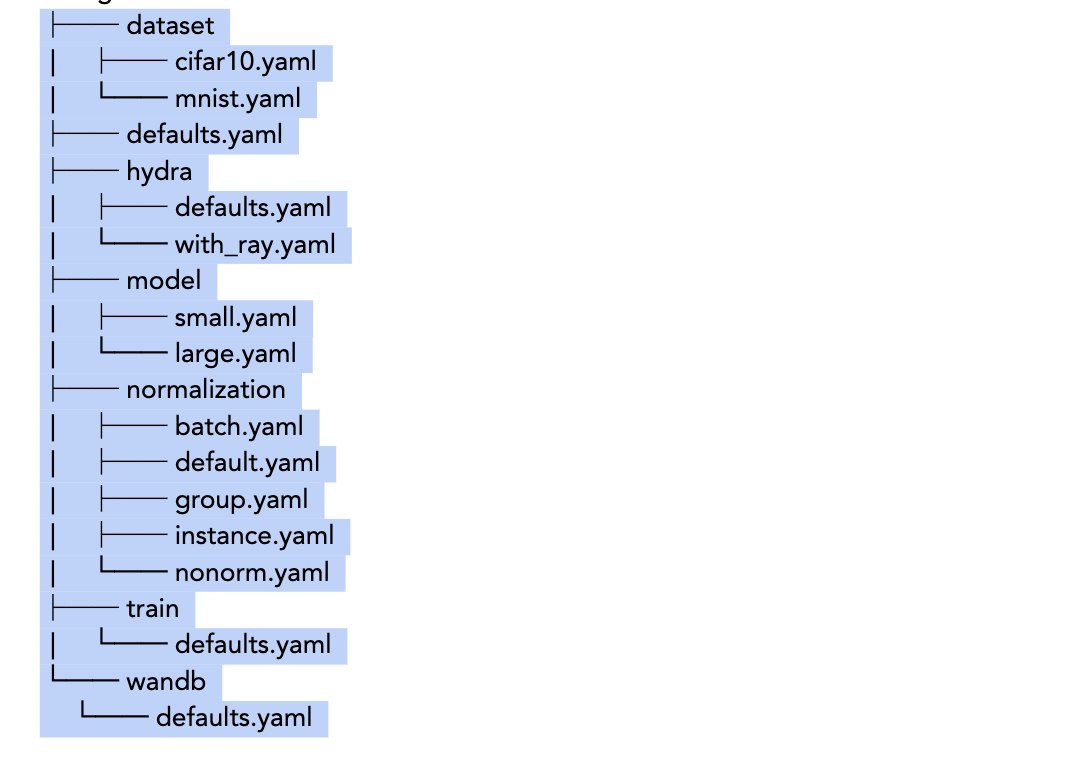

1. Create a directory confs/ or configs/ that contains all our configs
2. Specify which configuration to use. For example, cifar10.yaml, python run.py dataset=cifar10



In [ ]:
---
name: cifar10
dir: cifar10/
train_batch: 32
test_batch: 10
image_dim:
    - 32
    - 32
    - 3
num_classes: 10



3. The defaults.yaml specifies which dataset or model to use by default


In [ ]:
defaults:
    - dataset: mnist
    - model: ${dataset}
    - train: defaults
    - wandb: defaults
    - hydra: defaults
    - normalization: default
model:
    num_groups: -1
